In [1]:
import sys
sys.path.append('..//')

cap method area sum 6.282956822484538
expected area sum 6.283185307179586


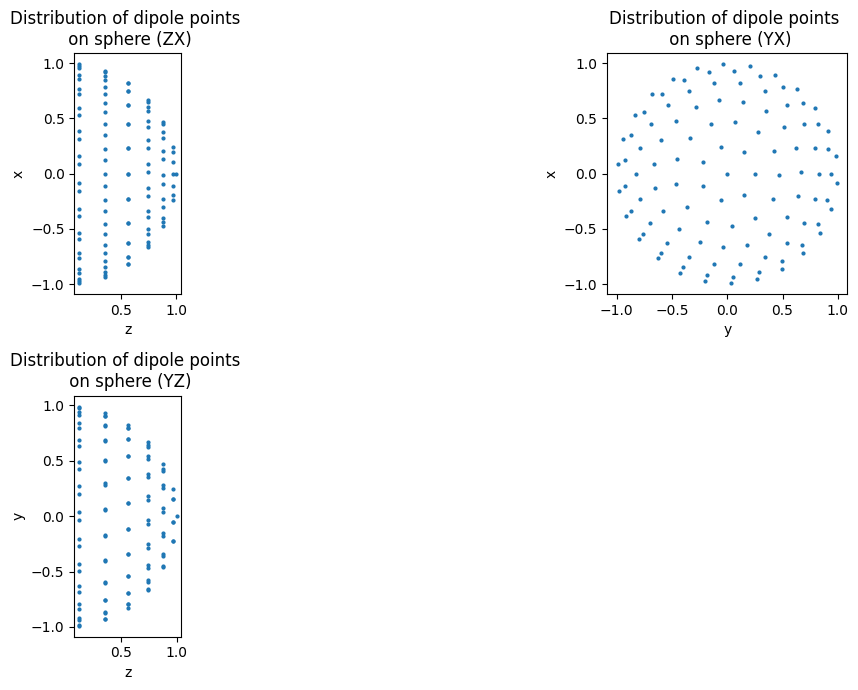

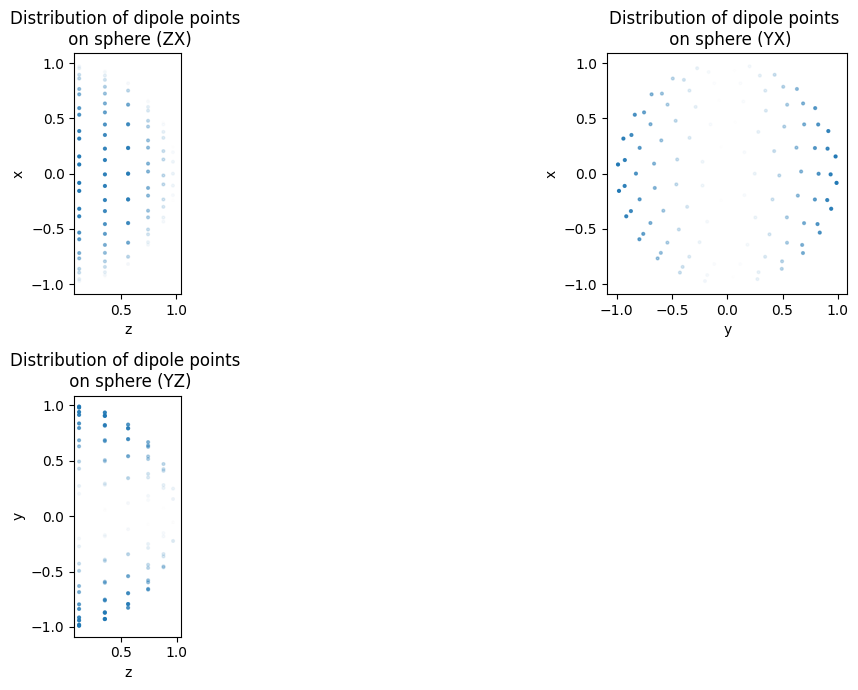

cap method area sum 3.5738632007305653
expected area sum 3.5738661731158983
n_dipoles 113
n_rays 583
initial energy shape ()


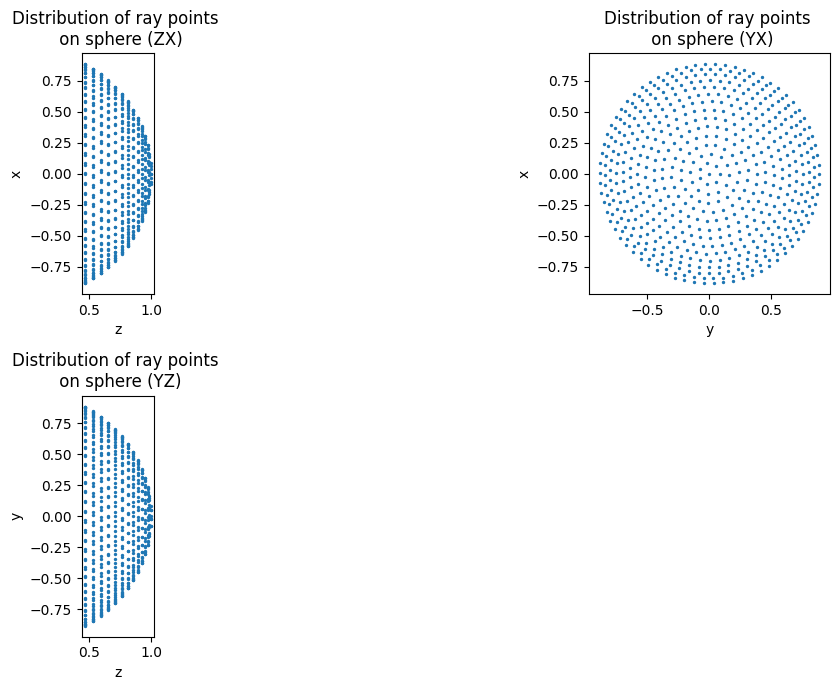

initialisation time in system 0.483872s
Flat pupil
CURVED REFRACTION
FLAT REFRACTION
-----before-----
[[[ 0.        ]
  [ 0.        ]
  [ 1.        ]]

 [[-0.08437238]
  [ 0.        ]
  [ 0.99643429]]

 [[-0.05260532]
  [-0.06596498]
  [ 0.99643429]]

 [[ 0.01877462]
  [-0.08225698]
  [ 0.99643429]]

 [[ 0.07601688]
  [-0.0366078 ]
  [ 0.99643429]]

 [[ 0.07601688]
  [ 0.0366078 ]
  [ 0.99643429]]

 [[ 0.01877462]
  [ 0.08225698]
  [ 0.99643429]]

 [[-0.05260532]
  [ 0.06596498]
  [ 0.99643429]]

 [[-0.14461511]
  [-0.06964297]
  [ 0.98703411]]

 [[-0.09041888]
  [-0.13262013]
  [ 0.98703411]]

 [[-0.01199498]
  [-0.16006184]
  [ 0.98703411]]

 [[ 0.06964297]
  [-0.14461511]
  [ 0.98703411]]

 [[ 0.13262013]
  [-0.09041888]
  [ 0.98703411]]

 [[ 0.16006184]
  [-0.01199498]
  [ 0.98703411]]

 [[ 0.14461511]
  [ 0.06964297]
  [ 0.98703411]]

 [[ 0.09041888]
  [ 0.13262013]
  [ 0.98703411]]

 [[ 0.01199498]
  [ 0.16006184]
  [ 0.98703411]]

 [[-0.06964297]
  [ 0.14461511]
  [ 0.98703411]]

[3.10668607 2.85326767 2.86507002 2.89361233 2.91911158 2.91911158
 2.89361233 2.86507002 2.62630214 2.6375011  2.6541484  2.67208728
 2.68639607 2.69277024 2.68917147 2.67676017 2.65935242 2.64185876
 2.62876029 2.62315327 2.40390997 2.41248115 2.423037   2.43449128
 2.44561563 2.4551638  2.46202103 2.46535936 2.46476705 2.4603176
 2.45255713 2.44241435 2.43105966 2.41974869 2.40967908 2.40187553
 2.39710701 2.39583312 2.39817538 2.17646299 2.18402831 2.19263895
 2.20172636 2.21067578 2.21886626 2.22571537 2.23072517 2.23352497
 2.23390513 2.23183706 2.22747594 2.22114588 2.21330984 2.20452906
 2.19541751 2.18659641 2.17865244 2.17210217 2.16736347 2.16473427
 2.16437832 2.1663177  2.17043185 1.94812943 1.95437946 1.96115979
 1.96819851 1.97520928 1.98190265 1.98799817 1.99323684 1.99739327
 2.00028673 2.00179038 2.00183797 2.00042742 1.99762087 1.9935414
 1.9883665  1.982319   1.97565606 1.96865713 1.96161144 1.9548059
 1.94851367 1.942984   1.93843333 1.93503806 1.93292877 1.9321861

217 escaped out of 583
time in trace_rays 0.428126s
ray count 366
scale range in _plot_unstructured None
min for scale 7.448068056667969
max for scale 62.278248186023276
Filling background of polar plot with zeroes!
max_r_in 0.004788 max_r 0.0035042828626115955


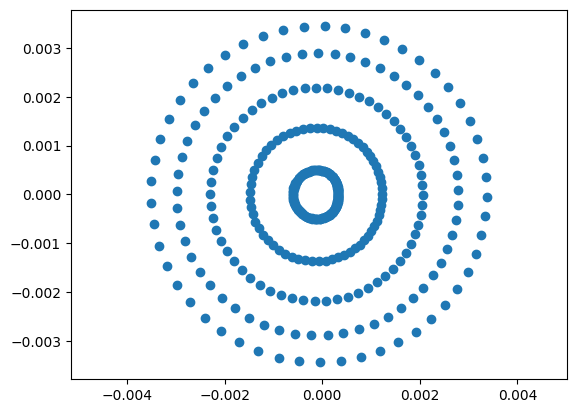

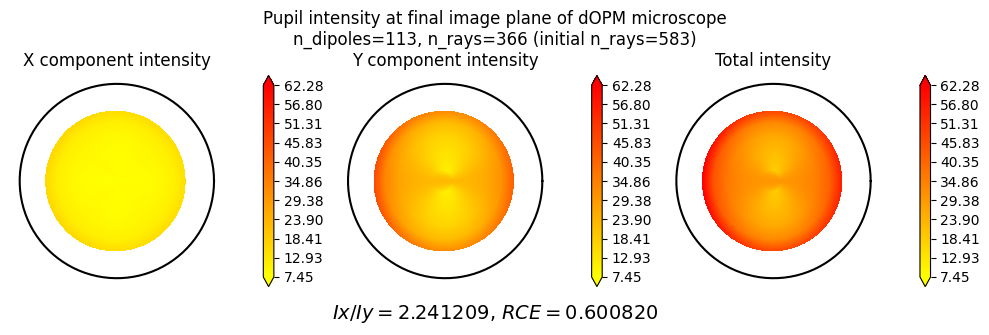

In [4]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 100

options = {
    'ray_count': 1000
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True
}

opm_angle = 1*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
TL2 = optical_elements.SineLens(NA=1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-6, perfect_mirror=True)

elements = [O1, O1, AgSiO2_mirror, O1]

source = dipole_source.DipoleSource()
source.generate_dipoles(dipole_count)
source.classical_photoselection((0,0))

system = OpticalSystem("mirror test system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)




cap method area sum 6.282956822484538
expected area sum 6.283185307179586


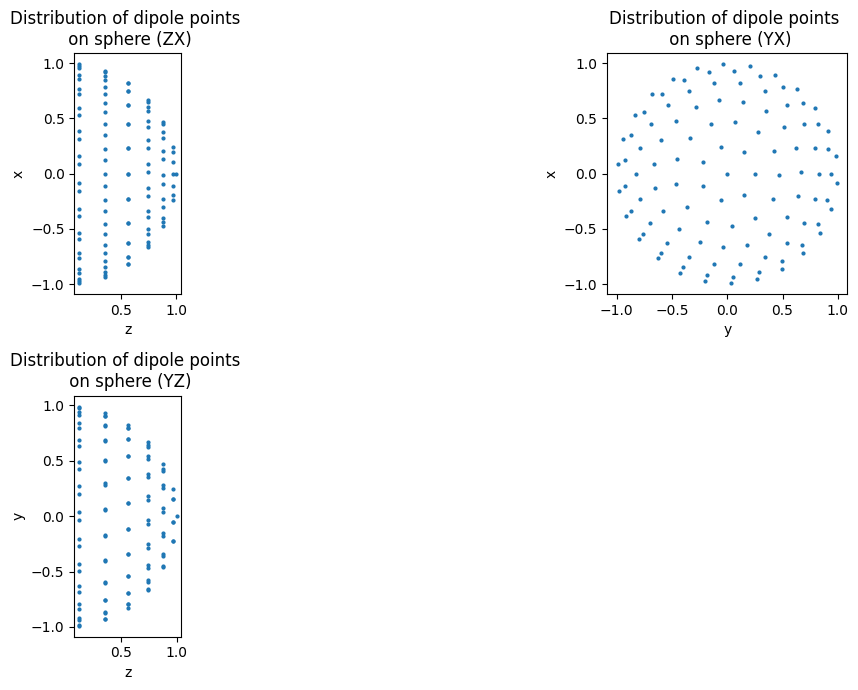

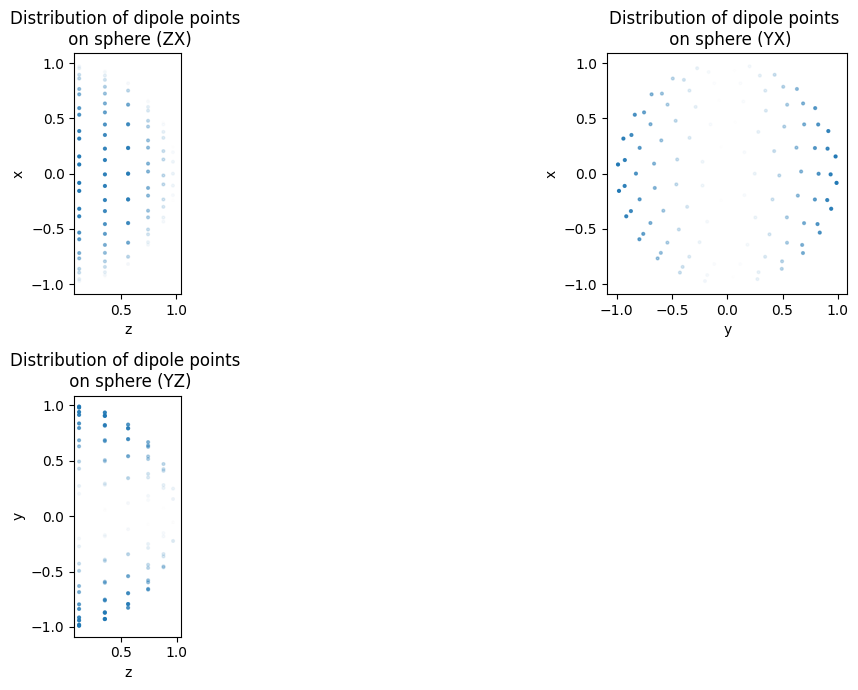

cap method area sum 3.573607440083569
expected area sum 3.5738661731158983
n_dipoles 113
n_rays 62
initial energy shape ()


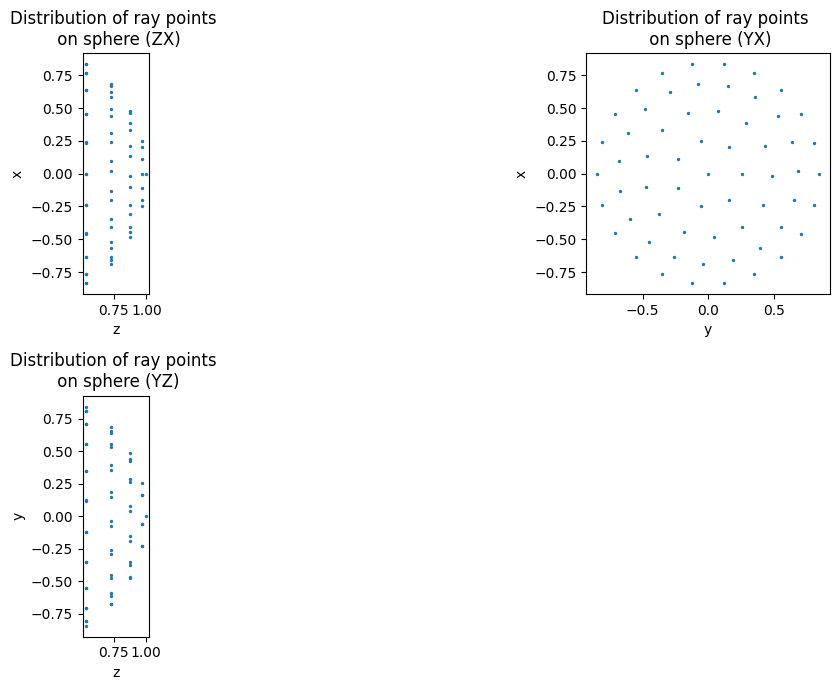

initialisation time in system 0.487379s
Curved pupil
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
FLAT REFRACTION
k_vec shape (62, 3, 1)
N shape (1, 3, 1)
imaginary kvec comps [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.

E_vec [[[[ 6.69998726e-01+1.67454306e-01j]
   [ 3.01347745e-01-3.31818410e-01j]
   [ 5.67314502e-02-2.50114138e-02j]]

  [[ 6.55293059e-01-2.39032222e-01j]
   [-3.72924538e-01-3.46518612e-01j]
   [ 5.67314502e-02-2.50114138e-02j]]

  [[ 6.24420243e-01+7.45317568e-01j]
   [ 1.17550587e+00-5.07356396e-01j]
   [ 1.88164170e-01+1.05440756e-01j]]

  [[ 1.90653300e+00+1.30751158e+00j]
   [ 1.38418181e+00-1.60539202e+00j]
   [ 1.88164170e-01-6.88695984e-03j]]

  [[ 1.67794876e+01+1.62430556e+00j]
   [ 6.60484925e-01-1.62621266e+01j]
   [ 1.88164170e-01-1.13265234e-01j]]

  [[ 4.13055123e+01-2.56626940e+01j]
   [-2.36593061e+01-4.20431728e+01j]
   [ 1.88164170e-01-1.21797013e-01j]]

  [[ 2.09452659e+00-2.34989898e+00j]
   [-2.36104551e+00-2.16178035e+00j]
   [ 1.88164170e-01-2.51119449e-02j]]

  [[ 5.45943119e-01-8.85976702e-01j]
   [-1.27168752e+00-7.85482251e-01j]
   [ 1.88164170e-01+9.32665923e-02j]]

  [[ 5.85357963e-02+6.78856761e-01j]
   [ 1.41846695e+00-1.64413591e-01j]
   [ 3.31205053e

ValueError: Iz is non zero in ray's frame!

In [2]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 100

options = {
    'ray_count': 100
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True
}

opm_angle = 45*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
TL2 = optical_elements.SineLens(NA=1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-6,\
    "../refractive_index_data/SiO2.txt", "../refractive_index_data/Ag.txt")

HWP1 = optical_elements.WavePlate(0, np.pi)  # into PBS
HWP2 = optical_elements.WavePlate(np.pi/2, np.pi)  # reflected out of PBS
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)

elements = [O1, TL1, TL2, O2, HWP1, QWP, AgSiO2_mirror, O2, QWP, HWP2, TL2]

source = dipole_source.DipoleSource()
source.generate_dipoles(dipole_count)
source.classical_photoselection((0,0))

system = OpticalSystem("dOPM system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)


